In [75]:
import os
import pandas as pd
import numpy as np

import pylab as plt
import statistics
import scipy.stats

In [76]:
task='Jing'
data_year = "2020"
cell_name='U251MG'

data_dir = "/home/jing/Phd_project/project_GBM/gbm_Scripts/gbm_Scripts_bmra_u251mg/00_outputs_2020_U251MG/"

out_dir = "00_plots_" + data_year + "_" + cell_name + "_" 
#os.makedirs(out_dir, exist_ok = True)

## Data_norm

In [77]:
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
Data_norm=pd.read_excel(data_file,index_col=0)
display(Data_norm)

genes_list = Data_norm.columns.to_list()
print("Landmark genes in LINCS data:", len(genes_list), genes_list)

exp_id_list = Data_norm.index.to_list()
print("Experiments in LINCS data for " + cell_name + " cells:", len(exp_id_list), exp_id_list)

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_U251MG_24H:A03,-0.178654,-0.106862,-0.053731,-0.205517,0.046979,-0.194327,-0.089152,-0.179361,0.580473,-0.167862,...,1.102416,0.583696,-0.301771,-0.348191,-0.085294,0.432292,0.038529,0.056377,0.169081,0.546863
ASG002_U251MG_24H:A04,-0.248680,-0.225963,-0.163556,0.102533,-0.094521,-0.197752,-0.163377,-0.010686,0.259747,-0.332512,...,0.538267,-0.496454,-0.205721,-0.418292,-0.023744,-0.851458,0.069729,0.042527,0.191131,0.021112
ASG002_U251MG_24H:A05,-0.318979,-0.134862,0.162119,0.012683,0.236779,0.052273,-0.033902,0.260514,0.662598,0.126488,...,-0.358134,-0.290955,0.919129,-0.370292,0.109456,-0.814808,-0.214571,0.144152,-0.026894,0.258962
ASG002_U251MG_24H:J13,-0.017829,-0.109138,-0.439906,-0.024517,-0.276021,-0.153127,0.154698,-0.142136,-0.579652,-0.060863,...,0.318117,0.102971,-0.366371,0.459958,-0.106243,3.750292,-0.208071,0.016977,-0.028694,-1.352387
ASG002_U251MG_24H:J14,0.080071,0.071262,0.019169,-0.044467,-0.038345,0.172273,0.086048,-0.017986,0.383748,0.217487,...,-0.775883,-0.376554,-0.269170,0.549808,-0.072744,-0.168908,0.191229,-0.164898,0.107981,0.059913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASG002_U251MG_24H:P20,-1.165779,-1.174662,-0.033031,0.864033,-2.100671,-0.869127,0.980848,-0.957510,-2.027652,-0.916212,...,-1.323284,-1.647129,-0.519096,0.569209,0.038007,3.672717,-0.317571,-0.919523,0.538206,-0.492037
ASG002_U251MG_24H:P21,2.698371,-0.052563,0.054318,0.396834,0.475929,0.169673,-0.033352,0.673964,0.264697,-0.116463,...,-1.609534,-0.306254,1.567429,-0.415591,0.827707,-1.394509,0.763679,0.609552,0.484657,-0.194987
ASG002_U251MG_24H:P22,-2.207129,-1.624262,-0.820181,0.541859,-0.045420,-0.630427,-0.345902,1.146464,-1.532527,-1.898763,...,-1.565234,2.628596,1.788479,-0.665641,-0.261144,-2.291608,1.374029,1.721677,-1.342619,-0.320988
ASG002_U251MG_24H:P23,-1.404754,-2.019962,-0.160156,-0.557817,-0.016970,-0.422152,0.227673,0.505590,-1.000402,-0.751763,...,-0.537583,-0.185179,1.177080,-0.563542,-0.071394,-2.813858,-0.135696,0.358527,-0.698244,-1.047038


Landmark genes in LINCS data: 978 ['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1', 'ACAA1', 'ACAT2', 'ACBD3', 'ACD', 'ACLY', 'ACOT9', 'ADAM10', 'ADAT1', 'ADGRE5', 'ADGRG1', 'ADH5', 'ADI1', 'ADO', 'ADRB2', 'AGL', 'AKAP8', 'AKAP8L', 'AKR7A2', 'AKT1', 'ALAS1', 'ALDH7A1', 'ALDOA', 'ALDOC', 'AMDHD2', 'ANKRD10', 'ANO10', 'ANXA7', 'APBB2', 'APOE', 'APP', 'APPBP2', 'ARFIP2', 'ARHGAP1', 'ARHGEF12', 'ARHGEF2', 'ARID4B', 'ARID5B', 'ARL4C', 'ARNT2', 'ARPP19', 'ASAH1', 'ASCC3', 'ATF1', 'ATF5', 'ATF6', 'ATG3', 'ATMIN', 'ATP11B', 'ATP1B1', 'ATP2C1', 'ATP6V0B', 'ATP6V1D', 'AURKA', 'AURKB', 'AXIN1', 'B4GAT1', 'BACE2', 'BAD', 'BAG3', 'BAMBI', 'BAX', 'BCL2', 'BCL7B', 'BDH1', 'BECN1', 'BHLHE40', 'BID', 'BIRC2', 'BIRC5', 'BLCAP', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'BZW2', 'C2CD2', 'C2CD2L', 'C2CD5', 'C5', 'CAB39', 'CALM3', 'CALU', 'CAMSAP2', 'CANT1', 'CAPN1', 'CARMIL1', 'CASC3', 'CASK', 'CASP10', 'CASP2', 'CASP3', 'CASP7', 'CAST', 'CAT', 'CBLB

## Sig_info

In [78]:
data_file = os.path.join(data_dir, "sig_info_" + data_year + "_" + cell_name+ ".xlsx")
sig_info_cell_df = pd.read_excel(data_file, index_col = 0).fillna("")
display(sig_info_cell_df)

,cell,plate,time,level_3_samples,samples_number,pert_type,pert_drug,targets,targets_number,dose,dose_float
level_5_sig_id,,,,,,,,,,,
ASG002_U251MG_24H:A03,U251MG,ASG002,24 h,ASG002_U251MG_24H_X1_B35:A03,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_U251MG_24H:A04,U251MG,ASG002,24 h,ASG002_U251MG_24H_X1_B35:A04,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_U251MG_24H:A05,U251MG,ASG002,24 h,ASG002_U251MG_24H_X1_B35:A05,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_U251MG_24H:J13,U251MG,ASG002,24 h,ASG002_U251MG_24H_X1_B35:J13,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_U251MG_24H:J14,U251MG,ASG002,24 h,ASG002_U251MG_24H_X1_B35:J14,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
...,...,...,...,...,...,...,...,...,...,...,...
ASG002_U251MG_24H:P20,U251MG,ASG002,24 h,ASG002_U251MG_24H_X1_B35:P20,1,trt_cp,idarubicin,TOP2A,1,1.11 uM,1.11
ASG002_U251MG_24H:P21,U251MG,ASG002,24 h,ASG002_U251MG_24H_X1_B35:P21,1,trt_cp,idarubicin,TOP2A,1,0.12 uM,0.12
ASG002_U251MG_24H:P22,U251MG,ASG002,24 h,ASG002_U251MG_24H_X1_B35:P22,1,trt_cp,digitoxin,ATP1A1,1,10 uM,10.00


## Input_info - ALL_DATA (modules, STV)

In [79]:
data_file = "/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_LINCS/gbm_STVs.xlsx"
modules = pd.read_excel(data_file, sheet_name = "modules", index_col = 0)
display(modules)

""
Module
CDK1
CDK2
CDK4_6
p53
EGFR
Aurora
Estrogen
PDGFR
Hypoxia


## STV (State Transition Vectors)

In [80]:
data_file = "/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_LINCS/gbm_STVs.xlsx" 

STVs_df = pd.read_excel(data_file,sheet_name='STVs',index_col = 0)
STVs= pd.read_excel(data_file,sheet_name='STVs',index_col = 0)
display(STVs_df)

states = STVs.columns.to_list()
print("States:", states)

,GBM_onc,GBM_survival
Gene,,
AARS,-0.018282,-1.228394
ABCF1,-0.011879,-2.215623
ABL1,0.001878,0.436299
ACAA1,0.005391,1.394511
ACAT2,-0.022549,0.000000
...,...,...
TXLNA,-0.006227,0.000000
SPRED2,-0.030307,0.000000
EML3,0.060709,0.000000


States: ['GBM_onc', 'GBM_survival']


## DPD calculating

In [81]:
DPD_df = pd.DataFrame(
    np.zeros((len(exp_id_list), len(states))),
    index = exp_id_list,
    columns = states,
)

for exp_id in DPD_df.index:
    for state in states:
        DPD_df.loc[exp_id, state] = np.dot(Data_norm.loc[exp_id], STVs_df.loc[:, state])

display(DPD_df)

,GBM_onc,GBM_survival
ASG002_U251MG_24H:A03,0.094566,-7.093764
ASG002_U251MG_24H:A04,0.482062,0.880483
ASG002_U251MG_24H:A05,-0.746434,3.922134
ASG002_U251MG_24H:J13,0.371822,-3.911682
ASG002_U251MG_24H:J14,0.241045,-17.638609
...,...,...
ASG002_U251MG_24H:P20,1.381138,-4.084094
ASG002_U251MG_24H:P21,1.379187,-29.955279
ASG002_U251MG_24H:P22,0.275803,-19.490372
ASG002_U251MG_24H:P23,-0.574610,-0.721915


In [82]:
DPD_inf_df = pd.concat([
                            DPD_df,
                            sig_info_cell_df.loc[DPD_df.index, ["pert_drug", "targets", "dose"]]
                            ], axis = 1)

display(DPD_inf_df)

,GBM_onc,GBM_survival,pert_drug,targets,dose
ASG002_U251MG_24H:A03,0.094566,-7.093764,DMSO,DMSO_No_target,0 uM
ASG002_U251MG_24H:A04,0.482062,0.880483,DMSO,DMSO_No_target,0 uM
ASG002_U251MG_24H:A05,-0.746434,3.922134,DMSO,DMSO_No_target,0 uM
ASG002_U251MG_24H:J13,0.371822,-3.911682,DMSO,DMSO_No_target,0 uM
ASG002_U251MG_24H:J14,0.241045,-17.638609,DMSO,DMSO_No_target,0 uM
...,...,...,...,...,...
ASG002_U251MG_24H:P20,1.381138,-4.084094,idarubicin,TOP2A,1.11 uM
ASG002_U251MG_24H:P21,1.379187,-29.955279,idarubicin,TOP2A,0.12 uM
ASG002_U251MG_24H:P22,0.275803,-19.490372,digitoxin,ATP1A1,10 uM
ASG002_U251MG_24H:P23,-0.574610,-0.721915,digitoxin,ATP1A1,1.11 uM


In [9]:
#DPD_inf_df.to_excel(os.path.join(out_dir, "DPD_full" + data_year + "_" + cell_name + "_" + task + ".xlsx"))
#DPD_inf_df.to_csv(os.path.join(out_dir, "DPD_full" + data_year + "_" + cell_name + "_" + task + ".csv"))

# Read DPDs

In [83]:
import seaborn as sns

<Axes: xlabel='GBM_onc', ylabel='Count'>

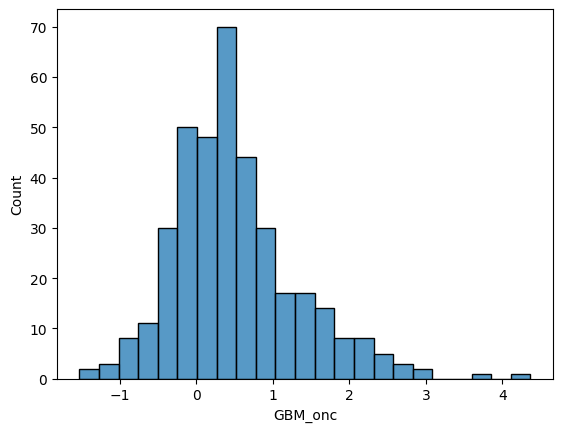

In [84]:
sns.histplot(DPD_inf_df['GBM_onc'])

<Axes: xlabel='GBM_survival', ylabel='Count'>

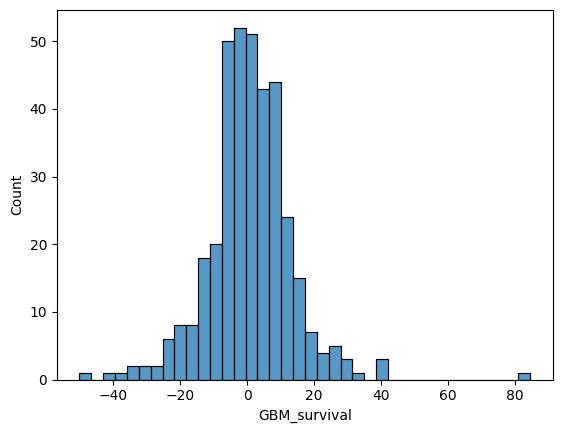

In [85]:
sns.histplot(DPD_inf_df['GBM_survival'])

## Analisys of DPD values to find targets

In [86]:
i = 0
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states[i])[:top],
                            DPD_inf_df.sort_values(by = states[i])[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,GBM_onc,GBM_survival,pert_drug,targets,dose
ASG002_U251MG_24H:P06,-1.529706,-3.912263,temozolomide,MGMT,0.12 uM
ASG002_U251MG_24H:G18,-1.394674,0.565415,tandutinib,"FLT3, KIT, PDGFRA, PDGFRB",0.08 uM
ASG002_U251MG_24H:N09,-1.143138,-4.984055,AZD-5363,,0.12 uM
ASG002_U251MG_24H:O16,-1.077889,11.033309,parbendazole,TUBB,10 uM
ASG002_U251MG_24H:E15,-1.070860,9.186405,levosulpiride,"DRD2, DRD3",0.12 uM
ASG002_U251MG_24H:E21,-1.012463,-5.816365,masitinib,"FGFR3, KIT, LYN, PDGFRA, PDGFRB",0.12 uM
ASG002_U251MG_24H:N04,-0.999357,-10.122980,BRD-K61033289,,10 uM
ASG002_U251MG_24H:H12,-0.934405,-8.667619,digoxin,ATP1A1,0.12 uM
ASG002_U251MG_24H:E13,-0.813614,-19.773291,levosulpiride,"DRD2, DRD3",10 uM
ASG002_U251MG_24H:G19,-0.808132,-2.952746,chelidonine,,6.66 uM


Targets: 14 ['', 'ALK, MET', 'ATP1A1', 'AURKA, AURKB, CDK1, CDK2', 'BCL2, BCL2L1, MCL1', 'DRD2, DRD3', 'FGFR3, KIT, LYN, PDGFRA, PDGFRB', 'FLT3, KIT, PDGFRA, PDGFRB', 'HDAC1, HDAC2', 'MGMT', 'PSMB1', 'PSMB1, PSMB2, PSMB5', 'TOP2A', 'TUBB']


In [87]:
i = 1
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states[i])[:top],
                            DPD_inf_df.sort_values(by = states[i])[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,GBM_onc,GBM_survival,pert_drug,targets,dose
ASG002_U251MG_24H:K18,0.537122,-50.021539,fludarabine,RRM1,0.12 uM
ASG002_U251MG_24H:I06,2.543670,-41.998105,daunorubicin,TOP2A,0.12 uM
ASG002_U251MG_24H:D10,3.067253,-36.377648,panobinostat,"HDAC1, HDAC2",10 uM
ASG002_U251MG_24H:H01,1.273894,-33.219960,BI-2536,PLK1,10 uM
ASG002_U251MG_24H:G03,1.348552,-32.505725,epirubicin,TOP2A,0.12 uM
ASG002_U251MG_24H:P21,1.379187,-29.955279,idarubicin,TOP2A,0.12 uM
ASG002_U251MG_24H:P09,0.704174,-29.371551,mitoxantrone,TOP2A,0.12 uM
ASG002_U251MG_24H:D11,1.876564,-27.511983,panobinostat,"HDAC1, HDAC2",1.11 uM
ASG002_U251MG_24H:D12,1.608497,-26.144723,panobinostat,"HDAC1, HDAC2",0.12 uM
ASG002_U251MG_24H:H08,0.388552,-23.046519,camptothecin,TOP1,1.11 uM


Targets: 9 ['', 'BIRC5', 'GABRA1, GABRA2, GABRA3, GABRA4, GABRA5, GABRA6, GABRB1, GABRB2, GABRB3, GABRD, GABRE, GABRG1, GABRG2, GABRG3, GABRP, GABRQ', 'HDAC1, HDAC2', 'PLK1', 'RRM1', 'SLC5A1', 'TOP1', 'TOP2A']


In [88]:
### copy manually
targets_list = ["ATP4A", "AVPR1A", "CYSLTR1", "CYSLTR2", "ESR1", "ESR2", "FKBP1A", "MTOR", "IDH1", "MAOA", "NFE2L2", "OPRD1", "OPRK1", "OPRM1", "PSMB1", "PSMB1", "PSMB2", "PSMB5", "PTGS1", "PTGS2", "ADRB2", "DRD1", "DRD2", "HRH1", "HTR1A", "HTR1B", "HTR2A", "AURKA", "AURKB", "FGFR1", "FGFR2", "KDR", "PDGFRA", "PDGFRB", "CYP2C19", "CYP2C9", "CYP3A4", "CYP3A5", "PTGS1", "DHODH", "ESR1", "GNRHR", "FKBP1A", "MTOR", "HDAC1", "HDAC2", "HDAC3", "HDAC6", "HDAC8", "MET", "MMUT", "PDE4D", "PSMB1", "PSMB2", "PSMB5", "PTGS1", "PTGS2", "SLC6A2", "AOC1", "ATP4A", "CDK2", "CDK7", "CDK9", "CHRM1", "DRD2", "HTR2A", "FFAR1", "PDE11A", "PDE5A", "PPARG", "PSMB1", "PSMB1", "PSMB2", "PSMB5"]
targets_list = sorted(list(set(targets_list )))
print("Targets:", len(targets_list ), targets_list) 

Targets: 57 ['ADRB2', 'AOC1', 'ATP4A', 'AURKA', 'AURKB', 'AVPR1A', 'CDK2', 'CDK7', 'CDK9', 'CHRM1', 'CYP2C19', 'CYP2C9', 'CYP3A4', 'CYP3A5', 'CYSLTR1', 'CYSLTR2', 'DHODH', 'DRD1', 'DRD2', 'ESR1', 'ESR2', 'FFAR1', 'FGFR1', 'FGFR2', 'FKBP1A', 'GNRHR', 'HDAC1', 'HDAC2', 'HDAC3', 'HDAC6', 'HDAC8', 'HRH1', 'HTR1A', 'HTR1B', 'HTR2A', 'IDH1', 'KDR', 'MAOA', 'MET', 'MMUT', 'MTOR', 'NFE2L2', 'OPRD1', 'OPRK1', 'OPRM1', 'PDE11A', 'PDE4D', 'PDE5A', 'PDGFRA', 'PDGFRB', 'PPARG', 'PSMB1', 'PSMB2', 'PSMB5', 'PTGS1', 'PTGS2', 'SLC6A2']


## Plots for targets

In [16]:
print_drugs = []

### CDK1/2

In [93]:
target = "CDK"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "CDK2"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target CDK2: 4 ['JNJ-7706621', 'PHA-793887', 'alvocidib', 'roscovitine']


In [90]:
drugs_list = drugs 

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
JNJ-7706621,"AURKA, AURKB, CDK1, CDK2","0.12 uM, 1.11 uM, 10 uM"
PHA-793887,"CDK1, CDK2, CDK4, CDK5, CDK7, CDK9","0.12 uM, 1.11 uM, 10 uM"
alvocidib,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9...","0.12 uM, 1.11 uM, 10 uM"
roscovitine,"CDK2, CDK7, CDK9","0.12 uM, 1.11 uM, 10 uM"


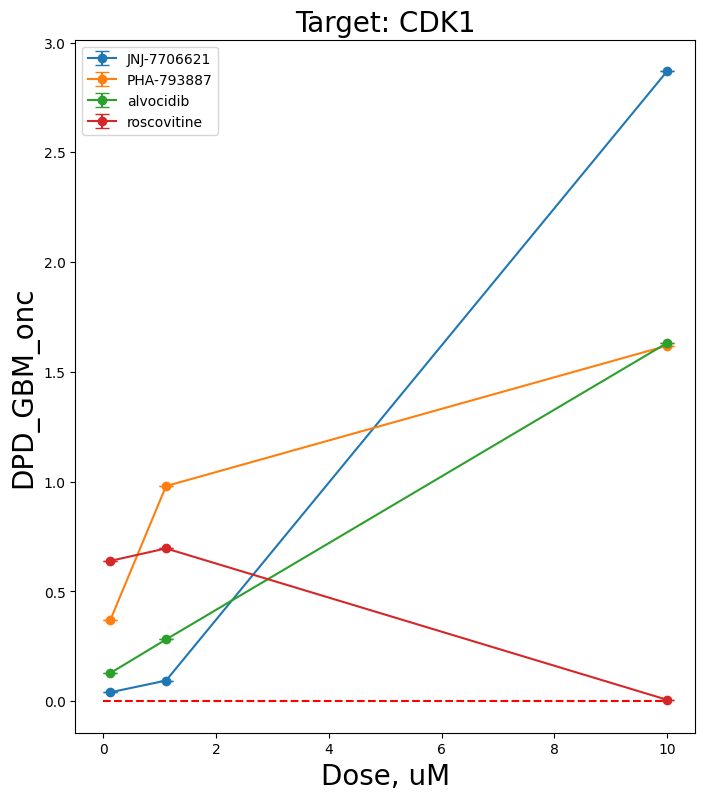

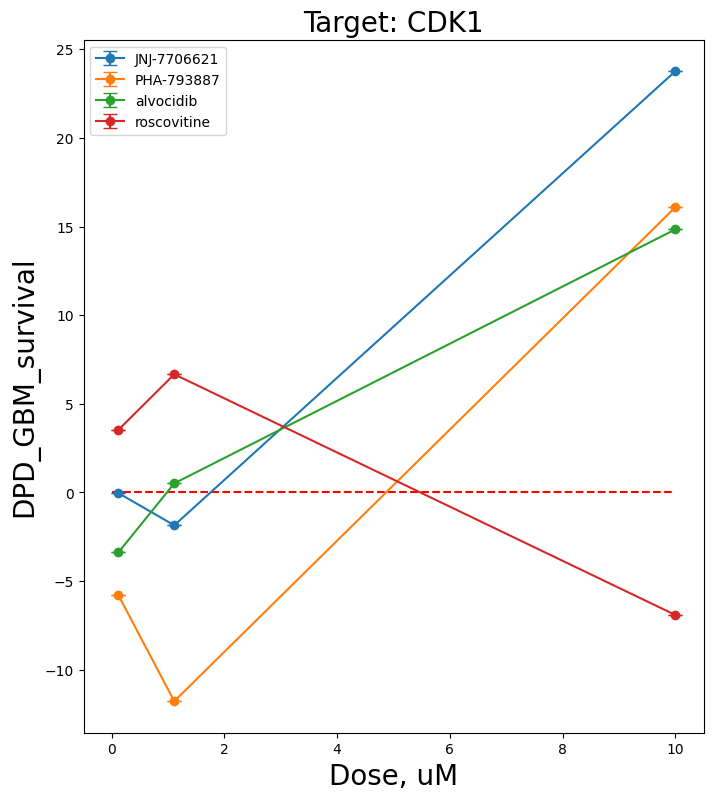

In [91]:
target_name = "CDK1"
target_drugs=drugs
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (8,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

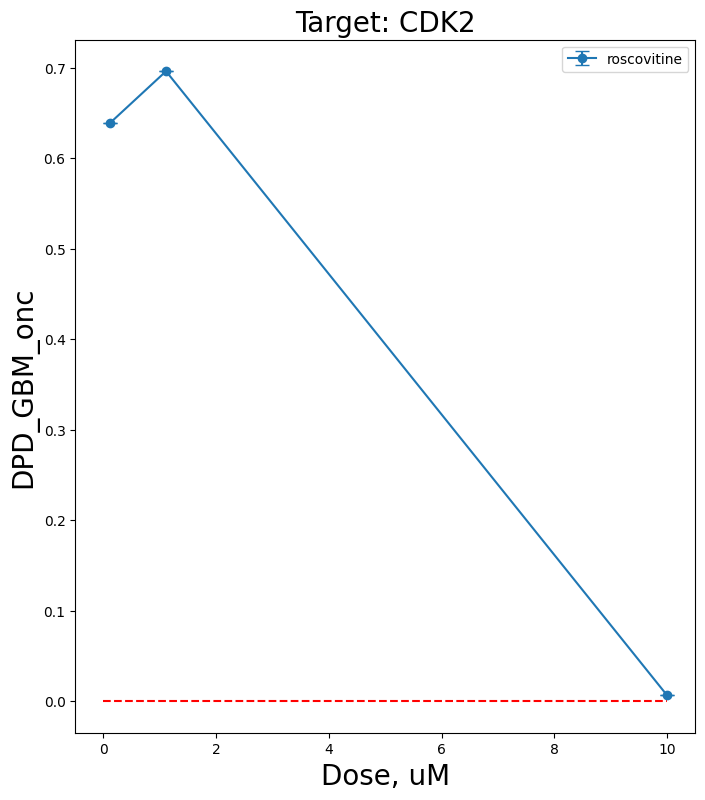

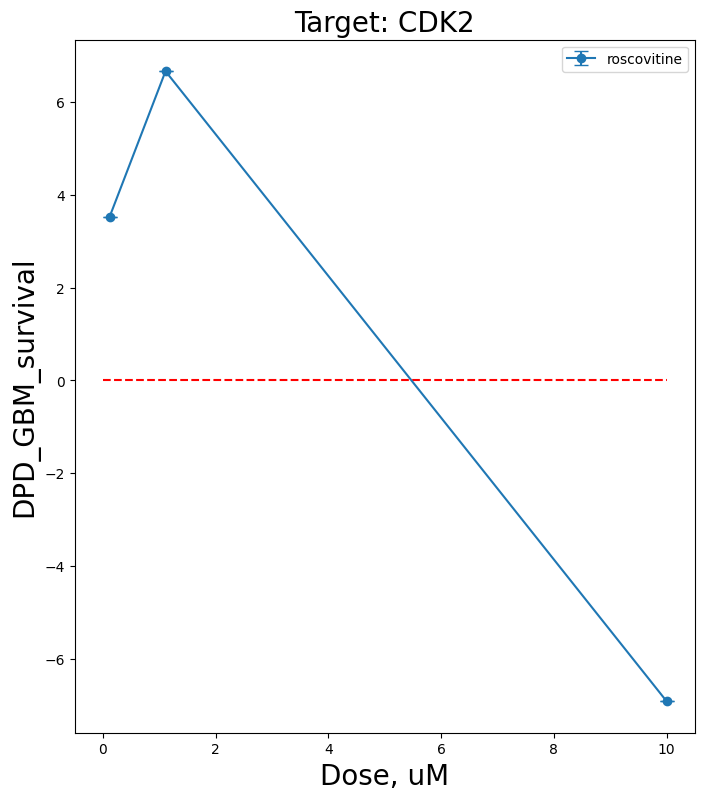

In [20]:
target_name = "CDK2"
target_drugs=drugs
target_drugs = ['roscovitine']
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (8,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [94]:
target = "CDK4"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "CDK6"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target CDK6: 3 ['PHA-793887', 'alvocidib', 'palbociclib']


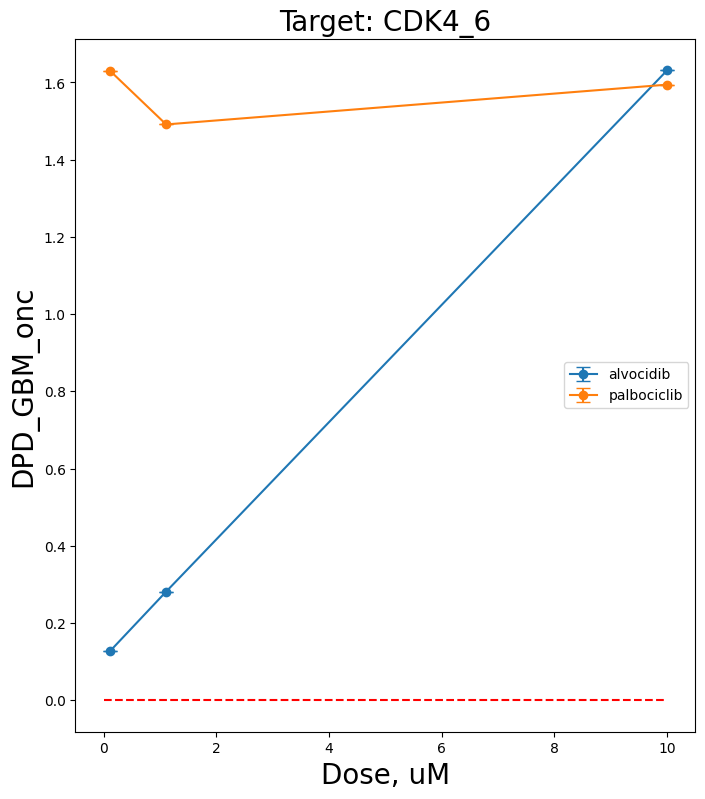

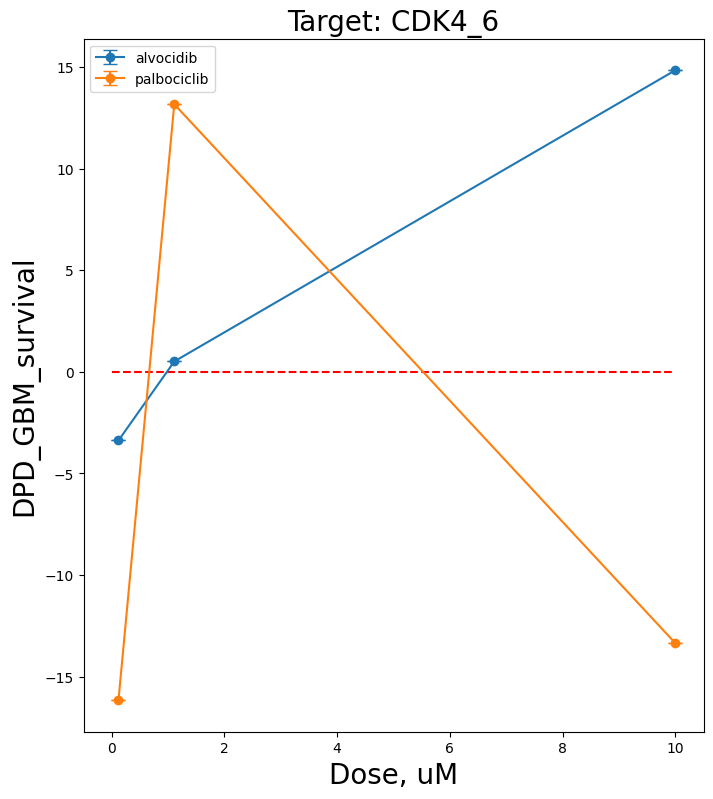

In [92]:
target_name = "CDK4_6"
target_drugs=drugs
target_drugs = ['alvocidib','palbociclib']
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (8,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### PI3K

In [132]:
target = "PIK3"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PIK3: 5 ['AS-605240', 'LY-294002', 'NVP-BEZ235', 'PI-103', 'taselisib']


In [134]:
drugs_list = drugs 
targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AS-605240,PIK3CG,"0.12 uM, 1.11 uM, 10 uM"
LY-294002,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG, PLK1, PRKDC","0.12 uM, 1.11 uM, 10 uM"
NVP-BEZ235,"MTOR, PIK3CA, PIK3CD, PIK3CG","0.12 uM, 1.11 uM, 10 uM"
PI-103,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG","0.12 uM, 1.11 uM, 10 uM"
taselisib,PIK3CA,"0.12 uM, 1.11 uM, 10 uM"


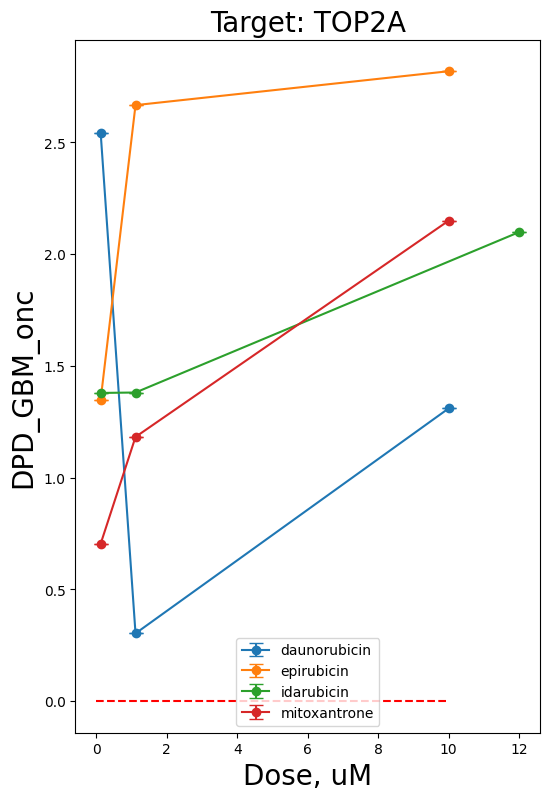

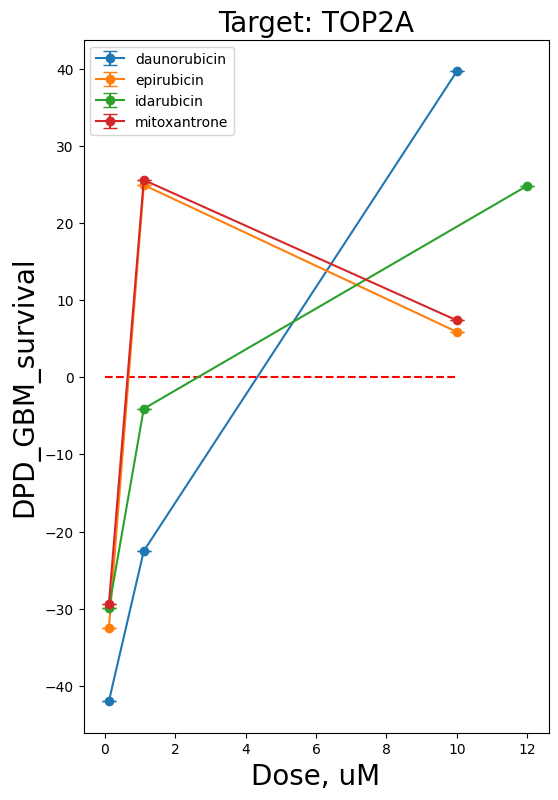

In [100]:
target_name = "TOP2A"
target_drugs=drugs_list
#target_drugs = ["PF-04691502", "XL-147", "GSK-2334470", "A-66", "BGT-226", "BX-795"]
# deleted idelalisib, quercetin because other targets = PIK3CD, PIK3CG (delta, gamma, we use only alpha)


for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### Hypoxia

In [101]:
target = "HIF"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))
drugs = ['BAY-87-2243', 'CAY-10585']
print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target HIF: 2 ['BAY-87-2243', 'CAY-10585']


In [102]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
BAY-87-2243,,
CAY-10585,,


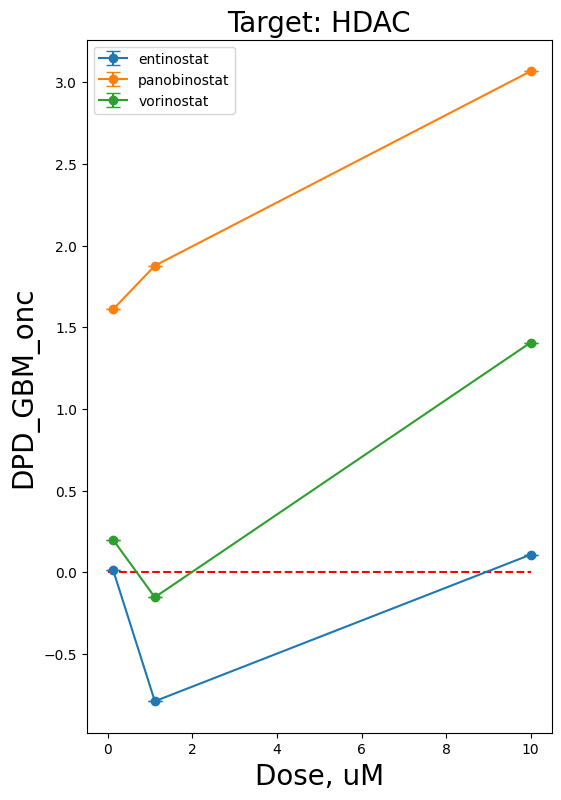

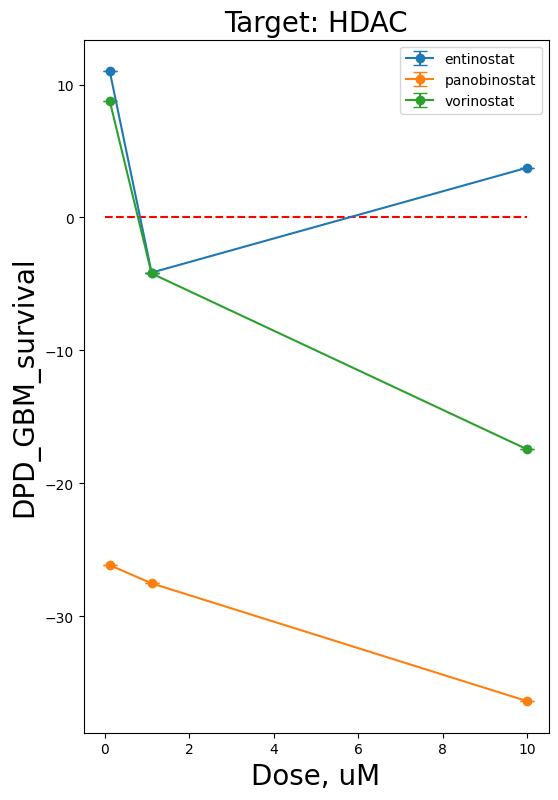

In [27]:
target_name = "HDAC"
target_drugs=drugs_list


for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### ERK

In [129]:
target_name = "ERK"

target = "MAP2K"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "MAPK"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "RAF"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

drugs for target ERK: 7 ['AZ-628', 'PD-0325901', 'dabrafenib', 'selumetinib', 'sorafenib', 'trametinib', 'vemurafenib']


In [130]:
drugs_list =drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AZ-628,"BRAF, RAF1","0.12 uM, 1.11 uM, 10 uM"
PD-0325901,MAP2K1,"0.12 uM, 1.11 uM, 10 uM"
dabrafenib,BRAF,"0.12 uM, 1.11 uM, 10 uM"
selumetinib,MAP2K1,"0.12 uM, 1.11 uM, 10 uM"
sorafenib,"BRAF, DDR2, FGFR1, FLT1, FLT3, FLT4, KDR, KIT,...","0.12 uM, 1.11 uM, 10 uM"
trametinib,"MAP2K1, MAP2K2","0.12 uM, 1.11 uM, 10 uM"
vemurafenib,BRAF,"0.12 uM, 1.11 uM, 10 uM"


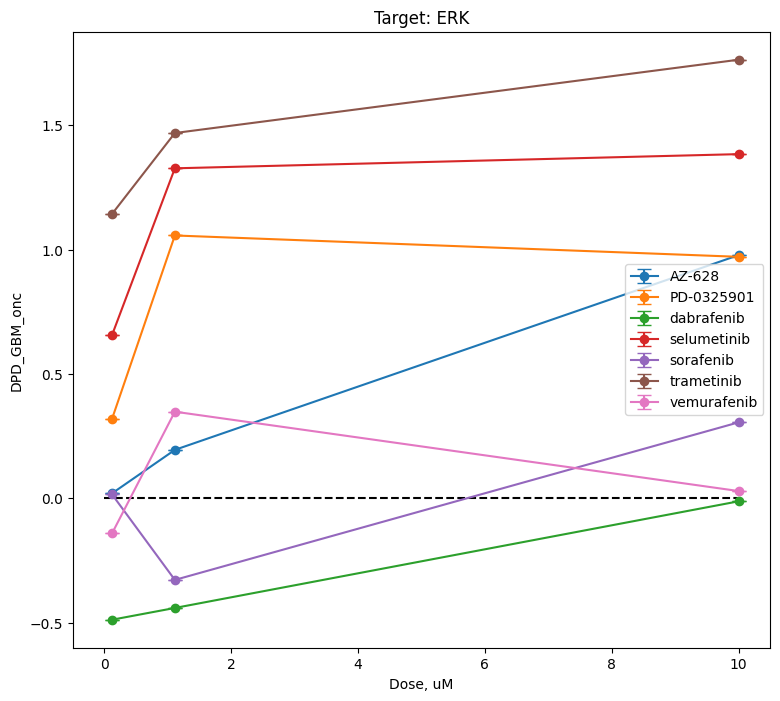

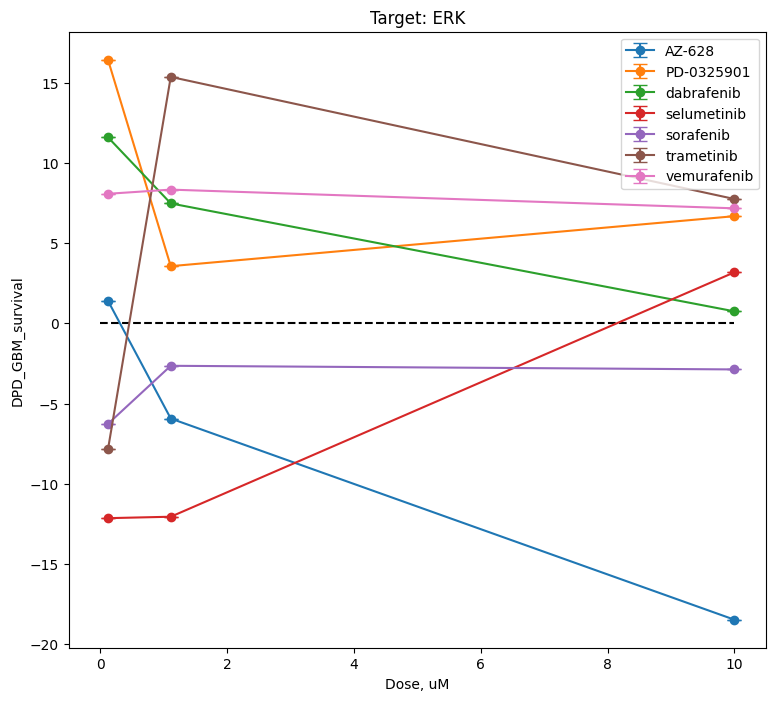

In [131]:
target_name = "ERK"
target_drugs = drugs_list
# deleted SB-203580 (MAPK1)
# select only gene name RAF1, BRAF, MAP2K1, MAP2K2, MAPK1, MAPK3   (Kinase pathway RAF->MEK->ERK) = module "ERK2

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [31]:
print_drugs += target_drugs

### EGFR

In [125]:
target = "EGFR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target EGFR: 6 ['afatinib', 'alvocidib', 'erlotinib', 'gefitinib', 'lapatinib', 'vandetanib']


In [107]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
afatinib,"EGFR, ERBB2, ERBB4","0.12 uM, 1.11 uM, 10 uM"
alvocidib,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9...","0.12 uM, 1.11 uM, 10 uM"
erlotinib,EGFR,"0.12 uM, 1.11 uM"
gefitinib,EGFR,"0.12 uM, 1.11 uM, 10 uM"
lapatinib,"EGFR, ERBB2","0.12 uM, 1.11 uM, 10 uM"
vandetanib,"EGFR, FLT1, FLT4, KDR, PTK6, RET, TEK","0.12 uM, 1.11 uM, 10 uM"


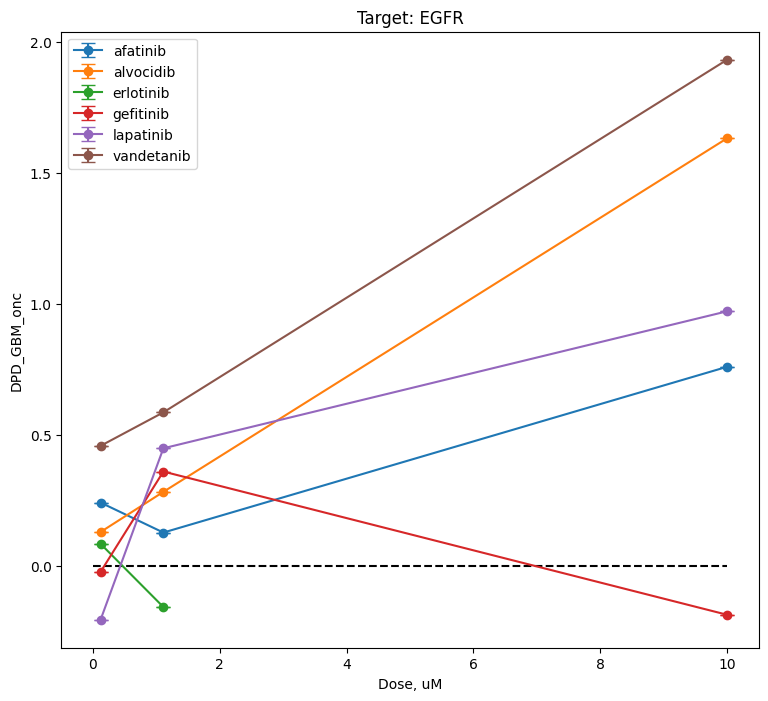

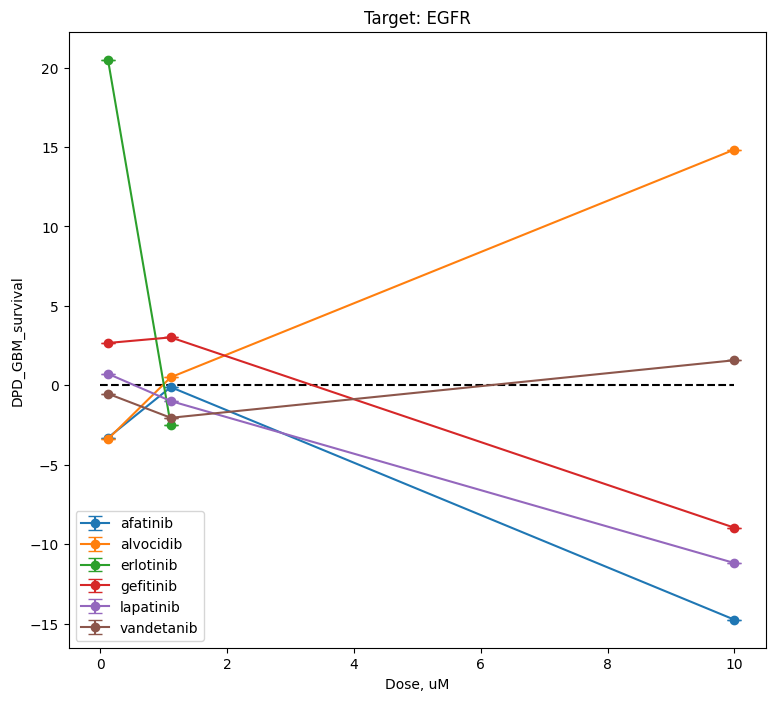

In [108]:
target_name = "EGFR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### JAK-STAT

In [35]:
target = "JAK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target JAK: 1 ['tozasertib']


In [36]:
drugs_list = drugs 

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
tozasertib,"ABL1, AURKA, AURKB, AURKC, BCR, FLT3, JAK2","0.12 uM, 1.11 uM, 10 uM"


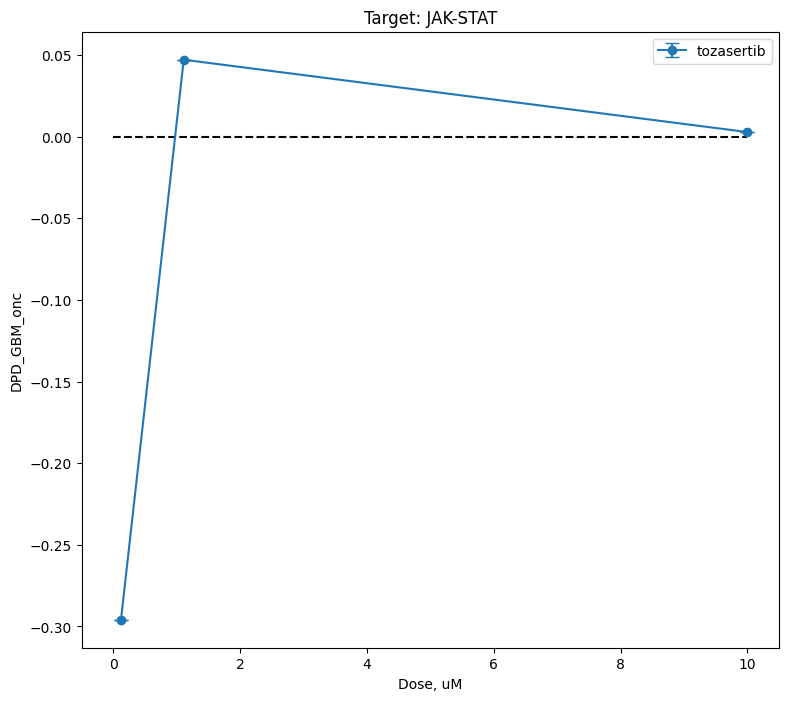

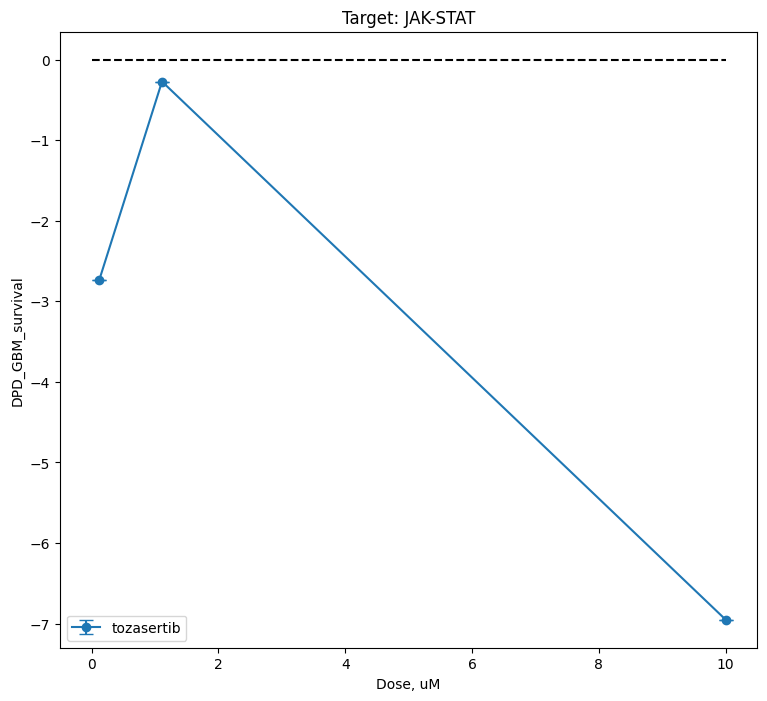

In [37]:
target_name = "JAK-STAT"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### Estrogen

In [126]:
target = "ESR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target ESR: 3 ['dienestrol', 'estradiol-cypionate', 'raloxifene']


In [127]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
dienestrol,ESR1,"0.12 uM, 1.11 uM, 10 uM"
estradiol-cypionate,ESR1,"0.12 uM, 1.11 uM, 10 uM"
raloxifene,"ESR1, ESR2","0.12 uM, 1.11 uM, 10 uM"


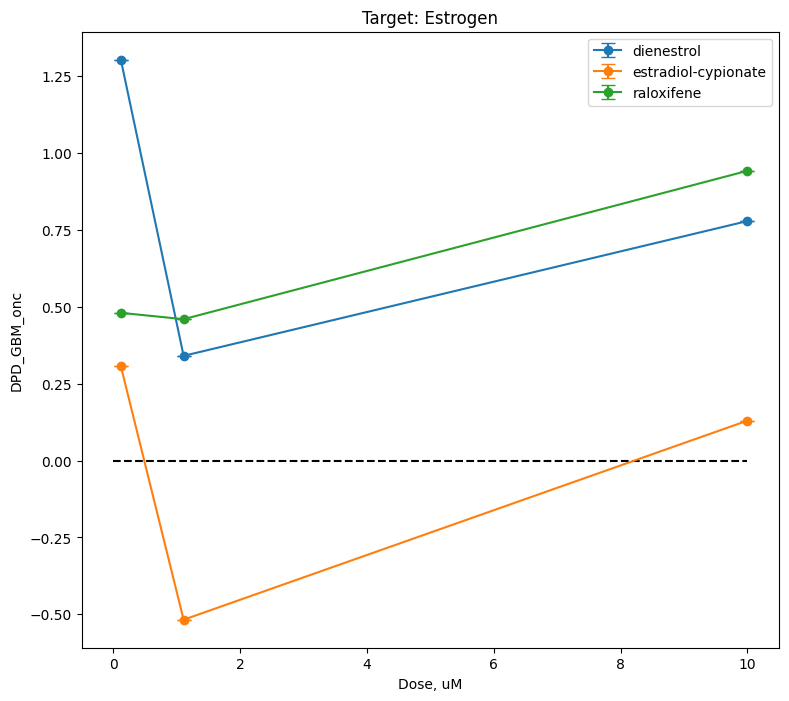

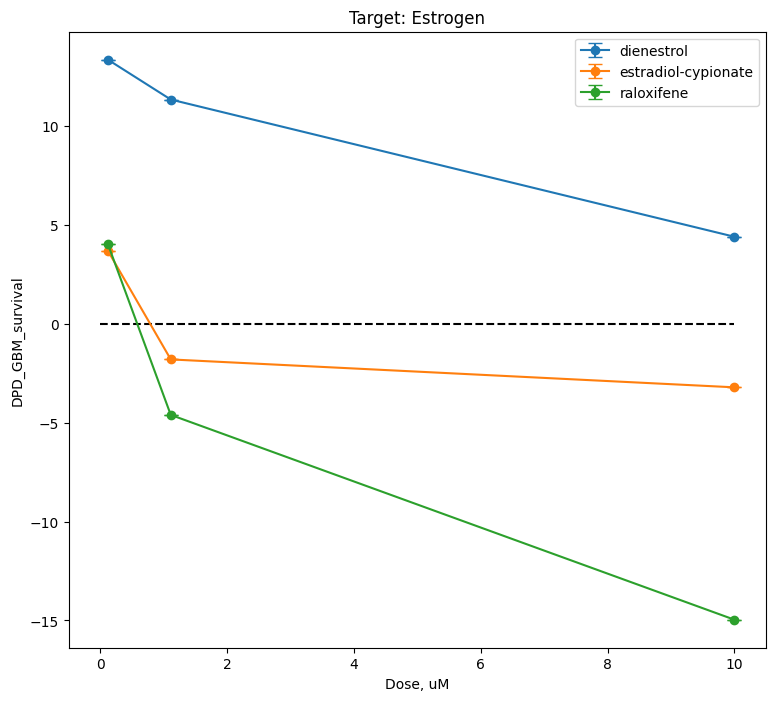

In [128]:
target_name = "Estrogen"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

### mTOR none

### ALK ummm

In [119]:
target = "ALK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target ALK: 3 ['alectinib', 'ceritinib', 'crizotinib']


In [120]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
alectinib,ALK,"0.12 uM, 1.11 uM, 10 uM"
ceritinib,ALK,"0.12 uM, 1.11 uM"
crizotinib,"ALK, MET","0.08 uM, 1.11 uM, 10 uM"


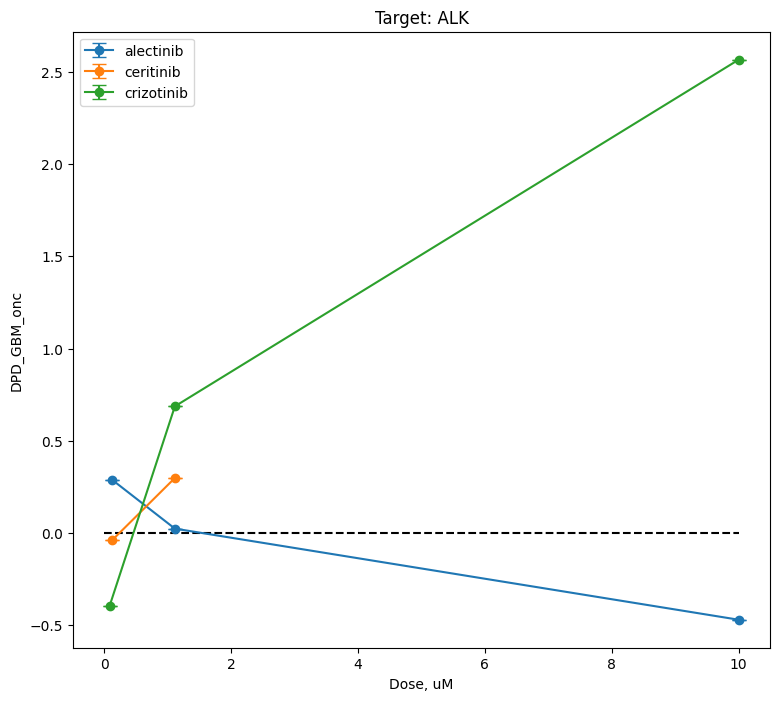

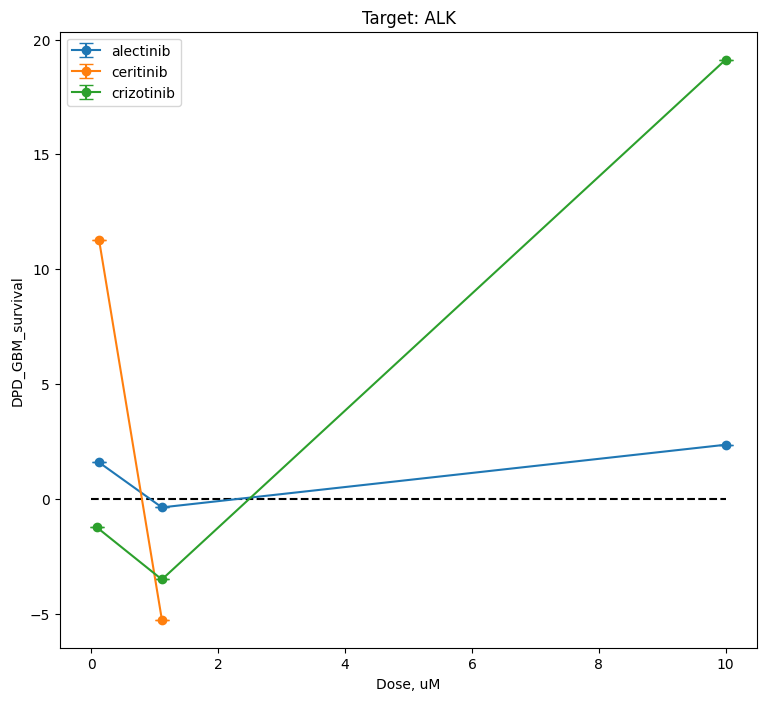

In [121]:
target_name = "ALK"
target_drugs =drugs

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

### TOP2A (all up)

In [117]:
target = "TOP2A"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target AKT: 0 []


In [115]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
daunorubicin,TOP2A,"0.12 uM, 1.11 uM, 10 uM"
epirubicin,TOP2A,"0.12 uM, 1.11 uM, 10 uM"
idarubicin,TOP2A,"0.12 uM, 1.11 uM, 12 uM"
mitoxantrone,TOP2A,"0.12 uM, 1.11 uM, 10 uM"


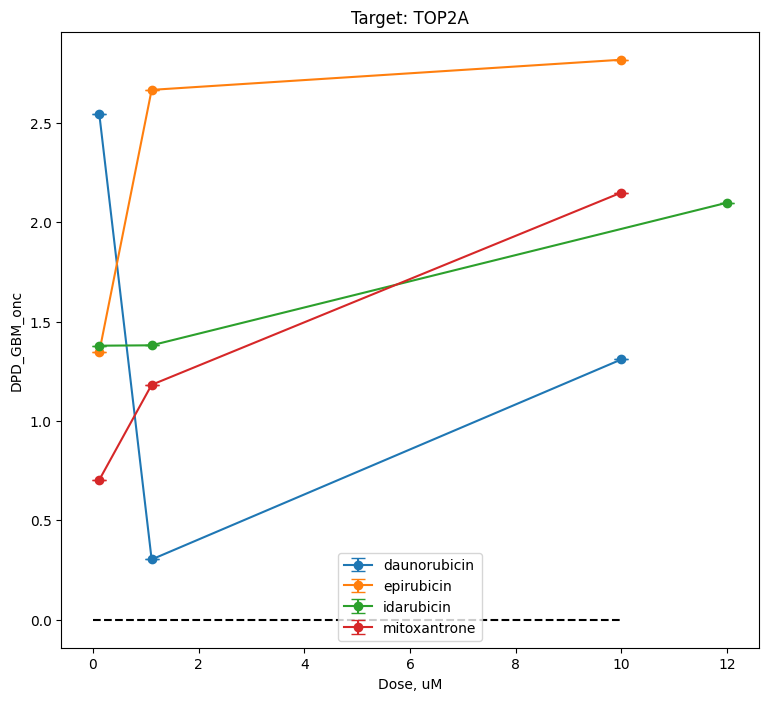

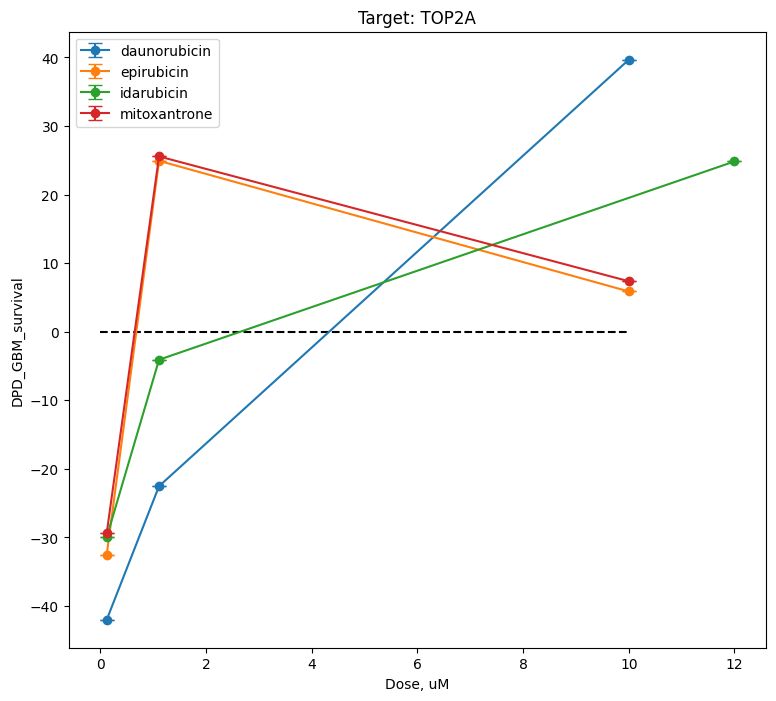

In [116]:
target_name = "TOP2A"
target_drugs =drugs

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

### No Astrogen

### p53

In [122]:
target = "MDM2"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target MDM2: 3 ['AMG-232', 'RITA', 'nutlin-3']


In [123]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AMG-232,MDM2,"0.12 uM, 1.11 uM, 10 uM"
RITA,MDM2,"0.08 uM, 1.11 uM, 10 uM"
nutlin-3,MDM2,"0.12 uM, 1.11 uM, 10 uM"


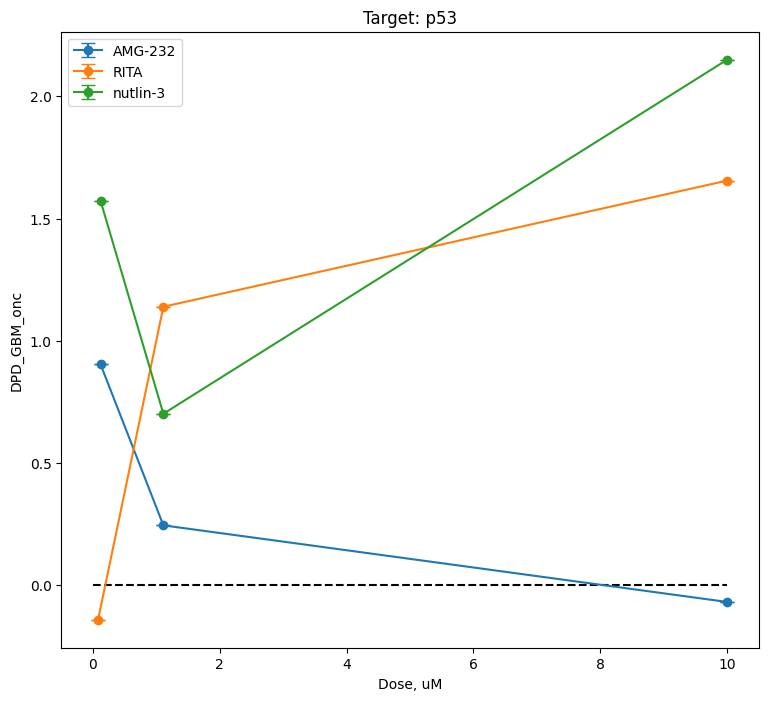

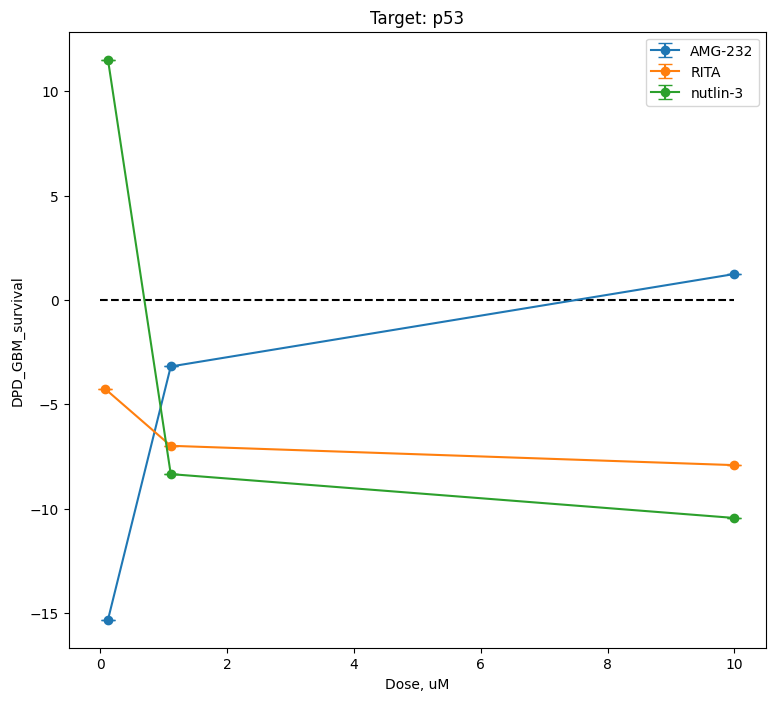

In [124]:
target_name = "p53"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

### Aurora

In [44]:
target = "AURK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target AURK: 3 ['JNJ-7706621', 'barasertib-HQPA', 'tozasertib']


In [45]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
JNJ-7706621,"AURKA, AURKB, CDK1, CDK2","0.12 uM, 1.11 uM, 10 uM"
barasertib-HQPA,AURKB,"0.12 uM, 1.11 uM, 10 uM"
tozasertib,"ABL1, AURKA, AURKB, AURKC, BCR, FLT3, JAK2","0.12 uM, 1.11 uM, 10 uM"


In [46]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
JNJ-7706621,"AURKA, AURKB, CDK1, CDK2","0.12 uM, 1.11 uM, 10 uM"
barasertib-HQPA,AURKB,"0.12 uM, 1.11 uM, 10 uM"
tozasertib,"ABL1, AURKA, AURKB, AURKC, BCR, FLT3, JAK2","0.12 uM, 1.11 uM, 10 uM"


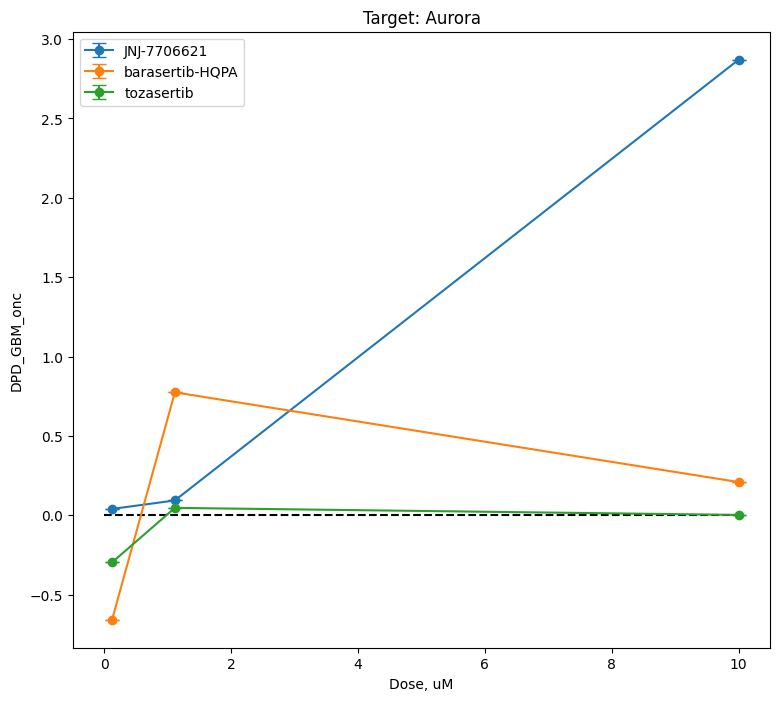

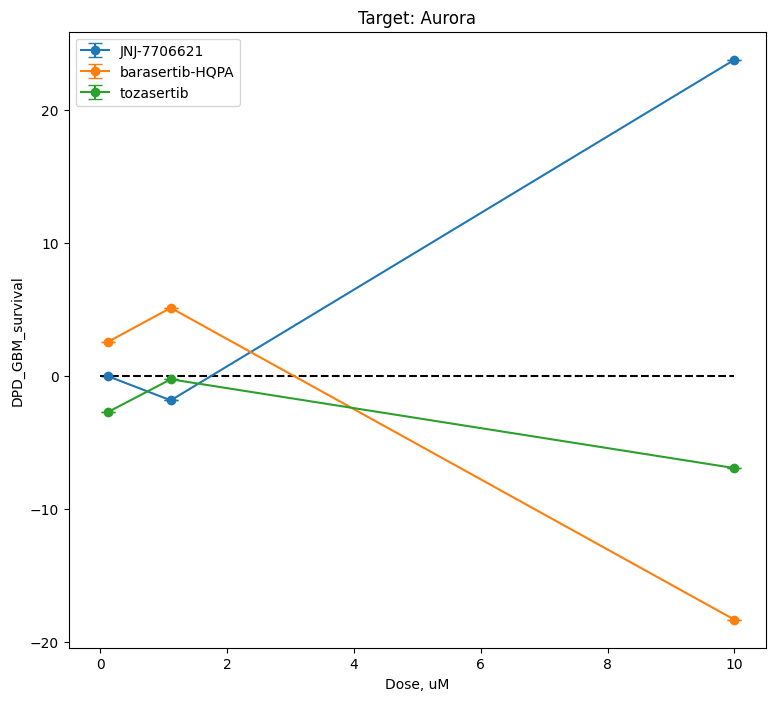

In [47]:
target_name = "Aurora"
target_drugs = drugs_list#["GSK-1070916", "MLN-8054", "ZM-447439", "alisertib", "JWE-035"]
# deleted ENMD-2076, KW-2449, orantinib because other targets 
# deleted aurora-a-inhibitor-i (2017) - not in data 2020

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [48]:
# delete JWE-035 bacause no enought info
print_drugs += ["GSK-1070916", "MLN-8054", "ZM-447439", "alisertib"]

### TGFbR

In [49]:
target = "ALK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target ALK: 3 ['alectinib', 'ceritinib', 'crizotinib']


In [50]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
alectinib,ALK,"0.12 uM, 1.11 uM, 10 uM"
ceritinib,ALK,"0.12 uM, 1.11 uM"
crizotinib,"ALK, MET","0.08 uM, 1.11 uM, 10 uM"


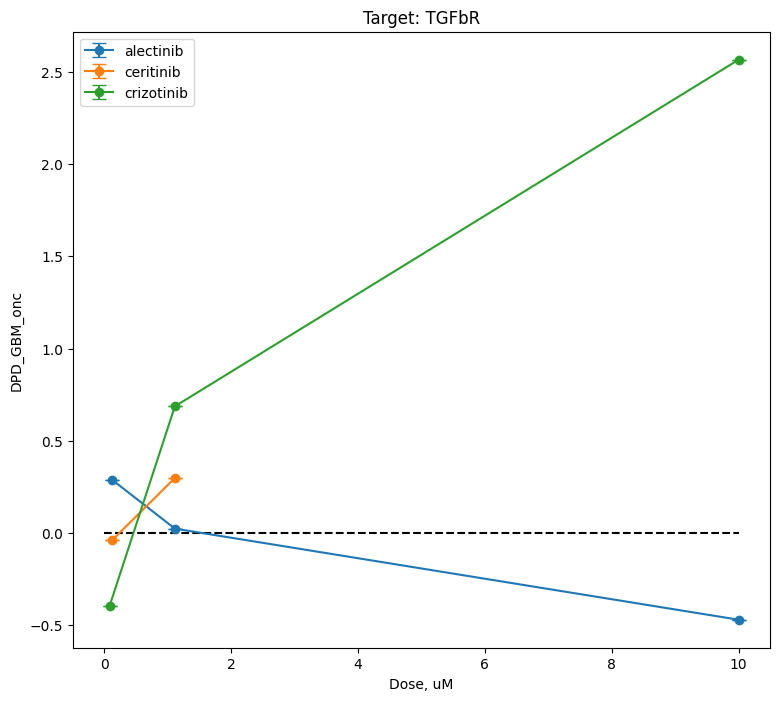

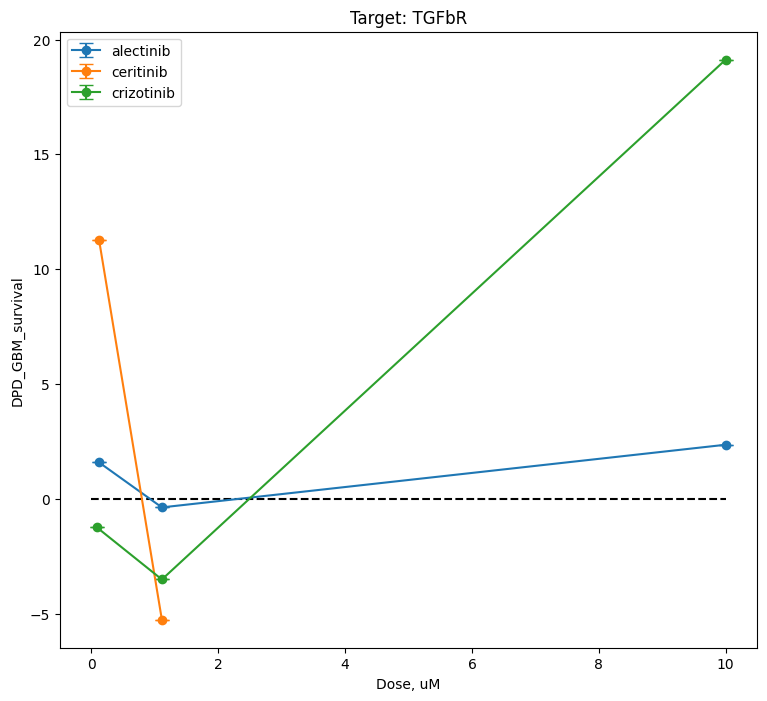

In [51]:
target_name = "TGFbR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [52]:
print_drugs += target_drugs

### FGFR

In [53]:
target = "FGFR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target FGFR: 3 ['masitinib', 'ponatinib', 'sorafenib']


In [54]:
drugs_list = drugs#"rebastinib", "lenvatinib", "orantinib", "foretinib", "cediranib", "sunitinib", "tivozanib"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
masitinib,"FGFR3, KIT, LYN, PDGFRA, PDGFRB","0.12 uM, 1.11 uM, 10 uM"
ponatinib,"ABL1, BCR, FGFR1, FGFR2, FGFR3, FGFR4, FLT3, K...","0.12 uM, 1.11 uM, 10 uM"
sorafenib,"BRAF, DDR2, FGFR1, FLT1, FLT3, FLT4, KDR, KIT,...","0.12 uM, 1.11 uM, 10 uM"


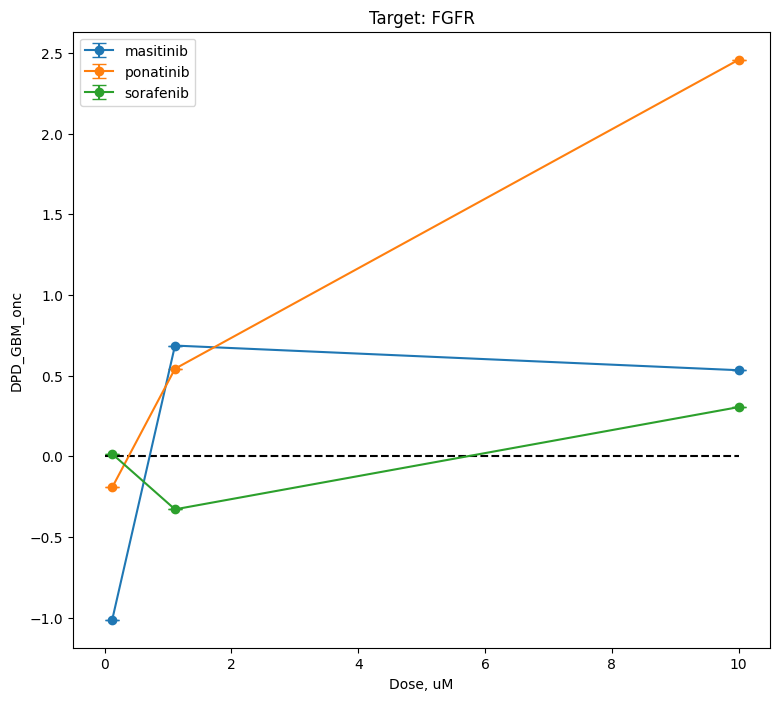

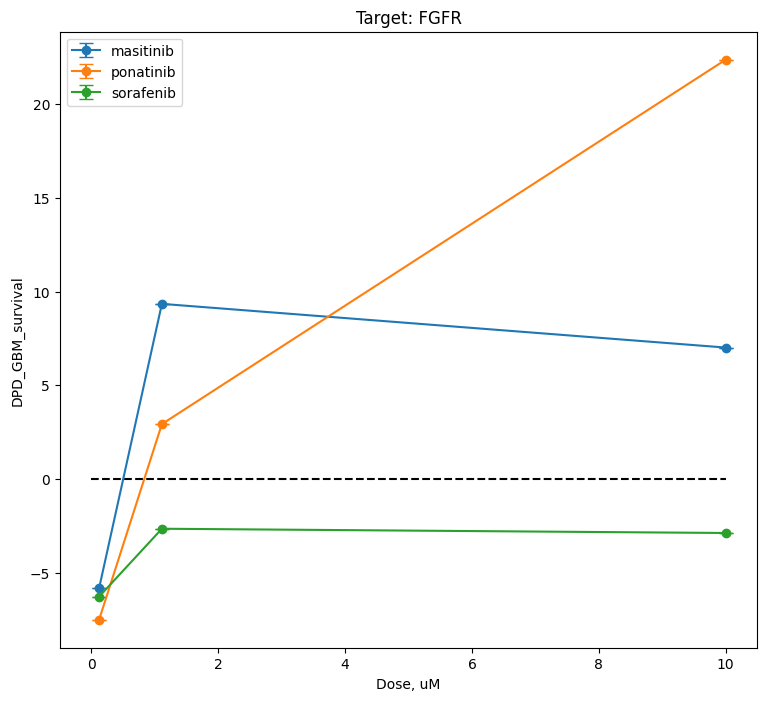

In [55]:
target_name = "FGFR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### PDGFR

In [56]:
target = "PDGF"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PDGF: 5 ['dasatinib', 'imatinib', 'masitinib', 'sorafenib', 'tandutinib']


In [57]:
drugs_list = drugs#['imatinib', 'masitinib', 'tandutinib']

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
dasatinib,"ABL1, BCR, EPHA2, FYN, KIT, LCK, LYN, PDGFRB, ...","0.12 uM, 1.11 uM"
imatinib,"ABL1, BCR, CSF1R, KIT, PDGFRA, PDGFRB","0.12 uM, 1.11 uM, 10 uM"
masitinib,"FGFR3, KIT, LYN, PDGFRA, PDGFRB","0.12 uM, 1.11 uM, 10 uM"
sorafenib,"BRAF, DDR2, FGFR1, FLT1, FLT3, FLT4, KDR, KIT,...","0.12 uM, 1.11 uM, 10 uM"
tandutinib,"FLT3, KIT, PDGFRA, PDGFRB","0.08 uM, 1.11 uM, 10 uM"


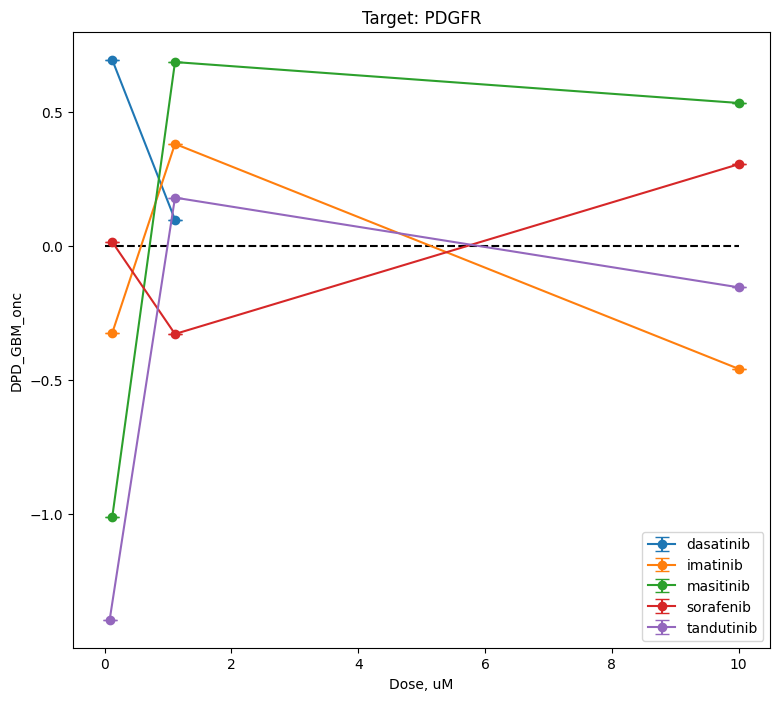

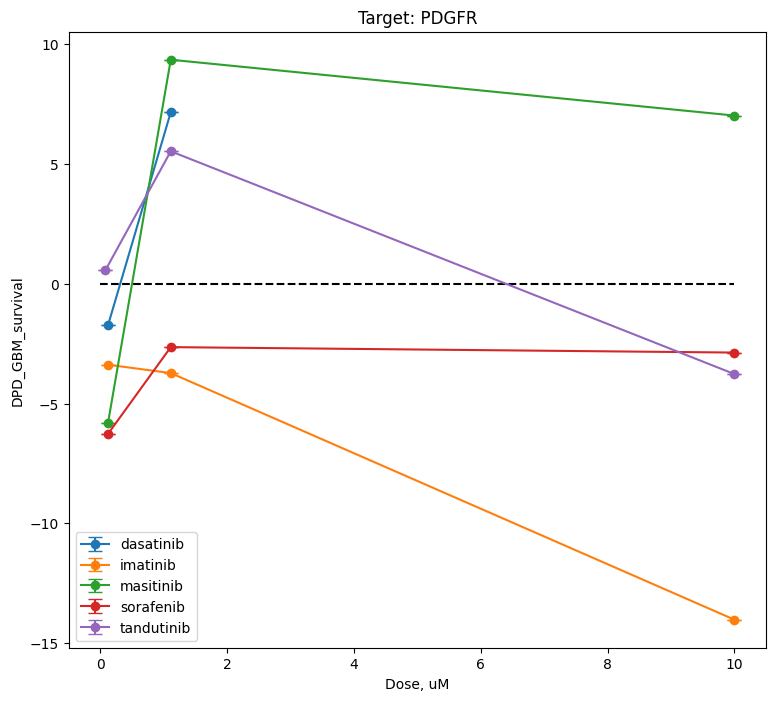

In [58]:
target_name = "PDGFR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [59]:
print_drugs += target_drugs

### MET

In [60]:
target = "MET"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target MET: 2 ['cabozantinib', 'crizotinib']


In [61]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
cabozantinib,"FLT3, KDR, KIT, MET, RET, TEK","0.12 uM, 1.11 uM, 10 uM"
crizotinib,"ALK, MET","0.08 uM, 1.11 uM, 10 uM"


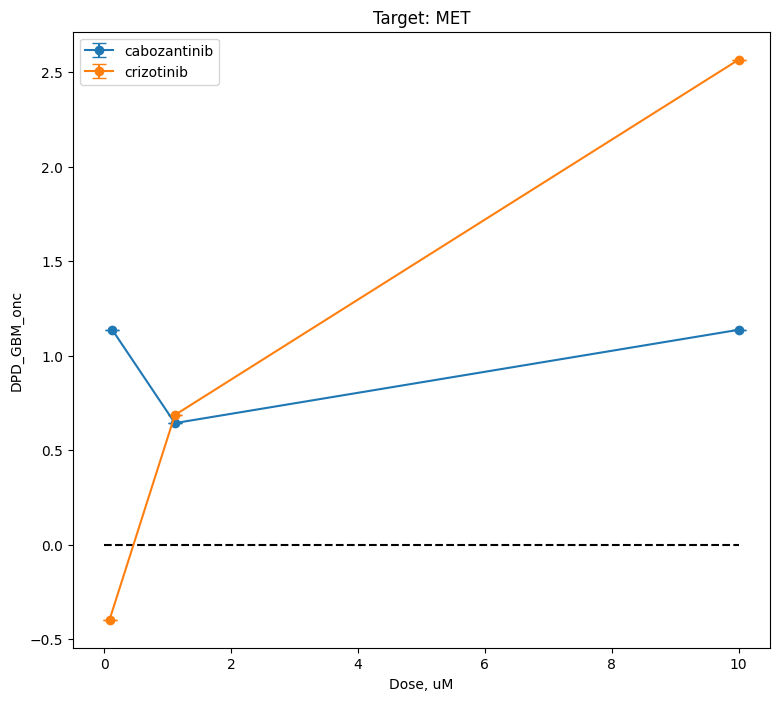

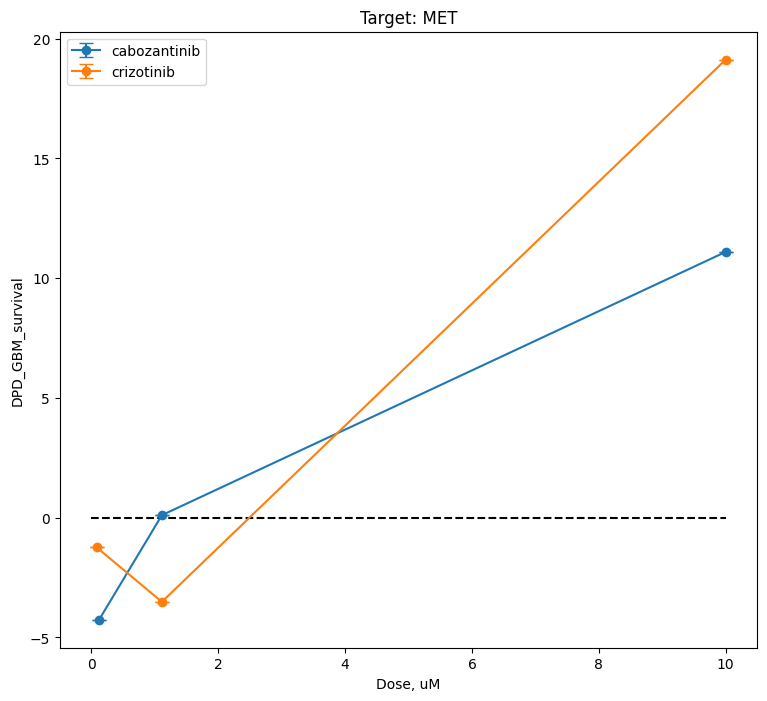

In [62]:
target_name = "MET"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [63]:
# delete module "PTGS"

### PSMB

In [64]:
target = "PSMB"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PSMB: 3 ['MG-132', 'bortezomib', 'ixazomib']


In [65]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
MG-132,PSMB1,"0.12 uM, 1.11 uM, 10 uM, 20 uM"
bortezomib,"PSMB1, PSMB2, PSMB5",20 uM
ixazomib,PSMB1,"0.12 uM, 1.11 uM, 10 uM"


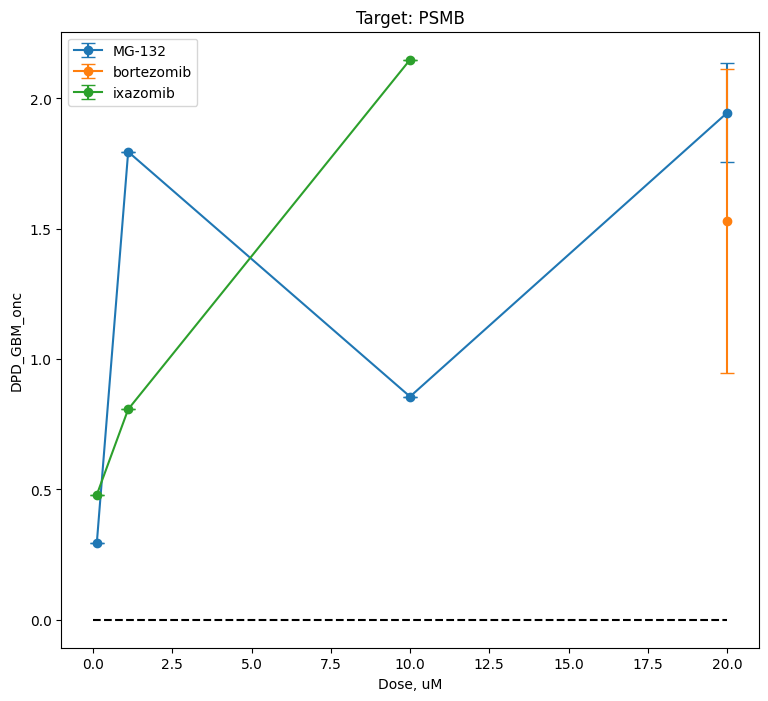

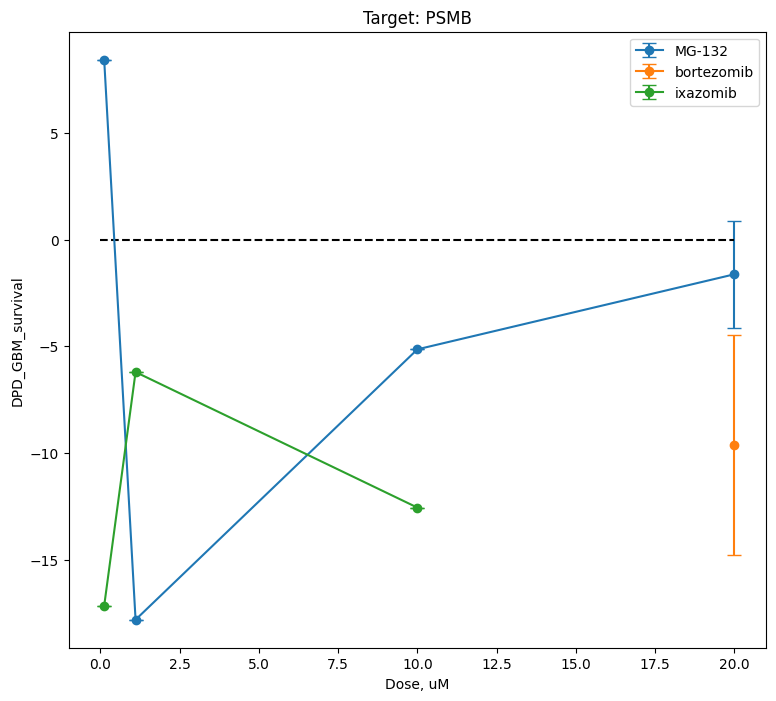

In [66]:
target_name = "PSMB"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,20], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [67]:
print_drugs += target_drugs

### GPBAR

In [68]:
# delete module "GPBAR"

### PPARG

In [69]:
target = "PPARG"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PPARG: 1 ['troglitazone']


In [70]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
troglitazone,PPARG,"0.12 uM, 1.11 uM, 10 uM"


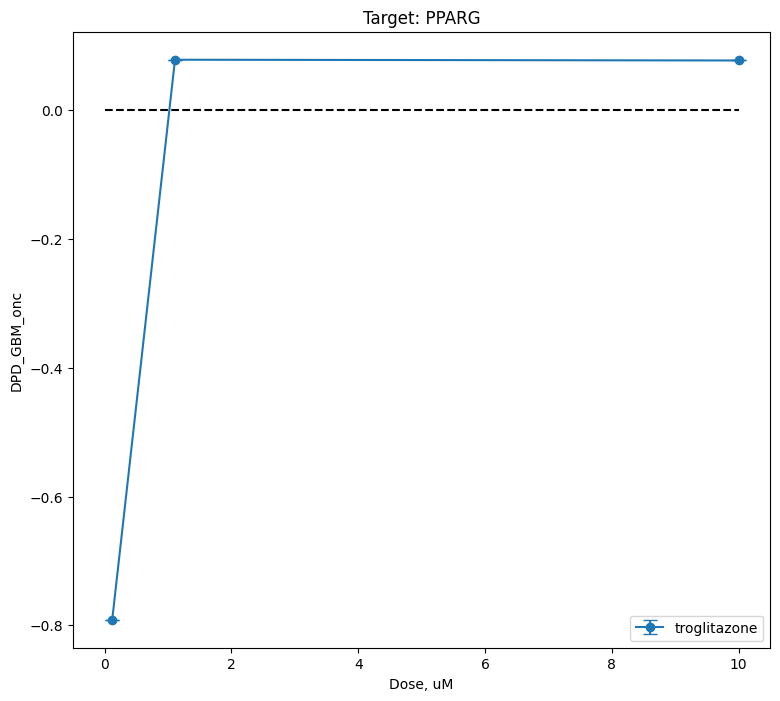

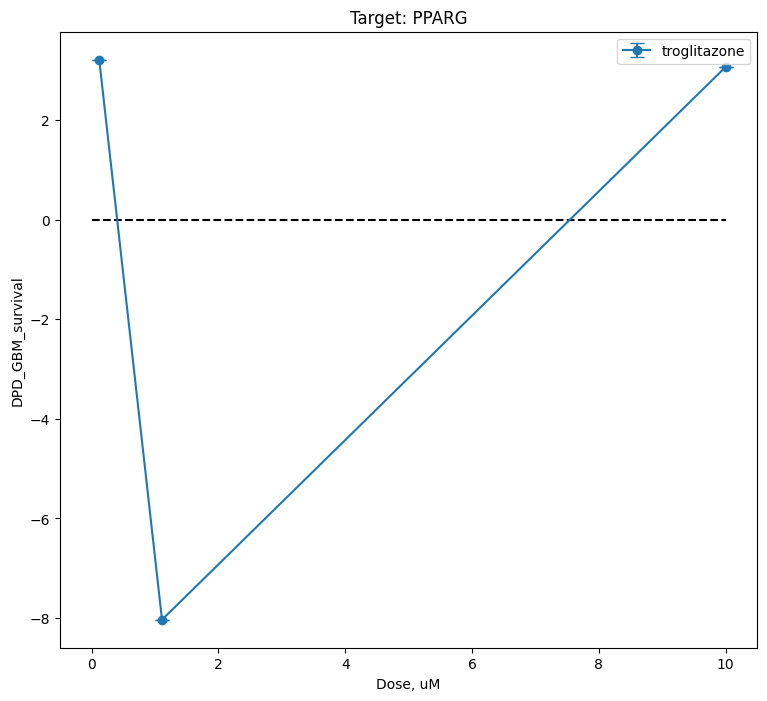

In [71]:
target_name = "PPARG"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [72]:
# delete module "PPARG"